In [1]:
import pandas as pd
from numpy import sqrt, absolute, mean
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score 


In [67]:
# is notebook and csv has diff. locations give the path of file in ''
data_set = pd.read_csv('test_1.csv')


<AxesSubplot:>

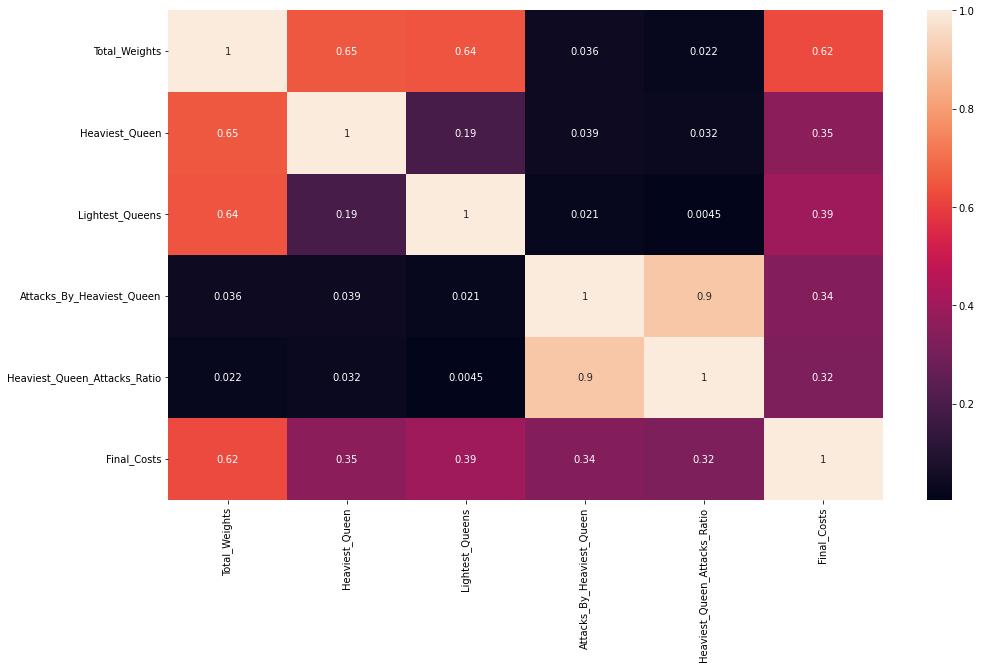

In [68]:
# this is correlation coefficient heat map
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = data_set.corr()
plt.figure(figsize = (16,9))
sns.heatmap(corr_matrix, annot = True)

In [29]:
data_set.head(3)

,Total_Weights,Queens_1,Queens_2,Queens_3,Queens_4,Queens_5,Queens_1_Attacks,Queens_2_Attacks,Queens_3_Attacks,Queens_4_Attacks,Queens_5_Attacks,Queen_1_Positions,Queen_2_Positions,Queen_3_Positions,Queen_4_Positions,Queen_5_Positions,Final_Costs
0,20,9,1,2,3,5,3,0,1,2,2,4,2,4,1,0,59
1,23,1,7,9,4,2,1,2,0,2,1,0,0,4,2,1,56
2,29,6,9,2,8,4,2,1,4,1,2,0,3,2,2,4,44


In [ ]:
# df = data_set.drop(['Heaviest_Queen', 'Lightest_Queens', 'Median_Weights', 'Heaviest_Queen_Attacks_Ratio', 'Initial_Boards','Lightest_Queen_Wt_Ratios',], axis=1)

In [69]:
x = data_set.drop('Final_Costs', axis=1)
y = data_set['Final_Costs']

In [70]:
# cv = KFold(n_splits=10, random_state=1, shuffle=True)
Model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [71]:
# this is to normalise the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train1 = sc.fit_transform(x_train)
x_test1 = sc.transform(x_test)


In [72]:
model = LinearRegression()
lr = model.fit(x_train1, y_train)
lr_y_pred = lr.predict(x_test1) 
abc = 1 - (1-model.score(x_train1, y_train))*(len(y_train)-1)/(len(y_train)-x_train1.shape[1]-1)

In [73]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score, matthews_corrcoef
import numpy as np

In [75]:
print('Mean Absolute Error:', mean_absolute_error(y_test, lr_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, lr_y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, lr_y_pred)))
print('R2 : ',r2_score(y_test, lr_y_pred))
print('Adjusted R2: ', abc)
# print('corr : ', matthews_corrcoef(y_test, lr_y_pred))

Mean Absolute Error: 29.415927609222628
Mean Squared Error: 1433.6463719579283
Root Mean Squared Error: 37.86352297340976
R2 :  0.4946838995786058
Adjusted R2:  0.4997510862123725


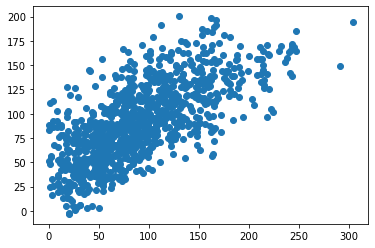

In [52]:
plt.scatter(y_test, lr_y_pred)
plt.show()

In [53]:
 # this is cross validation 
    cv = KFold(n_splits=10, random_state=1, shuffle=True)

IndentationError: unexpected indent (Temp/ipykernel_22088/1975675162.py, line 2)

In [54]:
scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=10)

sqrt(mean(absolute(scores)))

37.479042082372665

In [40]:

# this is for score checking/accuracy
Lr = Model.fit(x_train, y_train)
Lr.score(x_test, y_test)


0.46201952041927186

In [41]:
Rfc = RandomForestRegressor(random_state=2)
rfc_model = Rfc.fit(x_train1, y_train)
rfc_y_pred = rfc_model.predict(x_test1)
adjrfc = 1 - (1-Rfc.score(x_train1, y_train))*(len(y_train)-1)/(len(y_train)-x_train1.shape[1]-1)


In [42]:
print('Mean Absolute Error:', mean_absolute_error(y_test, rfc_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, rfc_y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, rfc_y_pred)))
print('R2 : ',r2_score(y_test, rfc_y_pred))
print('Adjusted R2: ', adjrfc)


Mean Absolute Error: 27.55839
Mean Squared Error: 1239.0663564
Root Mean Squared Error: 35.20037437869092
R2 :  0.5714774334504418
Adjusted R2:  0.9386896528806633


In [63]:
import sklearn



In [66]:
sklearn.metrics.matthews_corrcoef(y_test, lr_y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets